In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)  #sets nice background color
import matplotlib.pyplot as plt


# Preparing the data

In [2]:
#Importing the csv file

netflix = pd.read_csv('NetflixOriginals.csv')

In [3]:
#Viewing first few rows of the dataset

netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
netflix.shape

#We have 6 column entries and 584 rows

(584, 6)

In [5]:
#To understand more about the datatypes

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
netflix.describe()

# 5-point summaey
#Average movie run time is 94 mins and average IMDB score is 6

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [7]:
# To find if there are any null values

pd.DataFrame( netflix.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [8]:
# To check for unexpected values

pd.DataFrame(netflix.eq('?').sum(), columns= ['Number of missing observations'])


,Number of missing observations
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [9]:
# to do exploratory data analysis on the given dataset, let;s prepare the dataset better

netflix["Date"] = pd.to_datetime(netflix.Premiere)
netflix["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [10]:
netflix['Year'] = netflix['Date'].dt.year

In [11]:
netflix['Month'] = netflix['Date'].dt.month

In [76]:
netflix['Day'] = netflix['Date'].dt.day_of_week

In [13]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,5
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,30


In [14]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
 7   Year        584 non-null    int64         
 8   Month       584 non-null    int64         
 9   Day         584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 45.8+ KB


# ANALYSIS

### 1. Date

In [57]:
year = netflix.Year.value_counts()
year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

#### Maximum number of movies were introduced in 2020. Each year the number of movies being released is higher than th eprevious year 

#### Understanding that the 2021 data is incomplete we can assume that the number will also be eventually higher than 2020 data.

<AxesSubplot:>

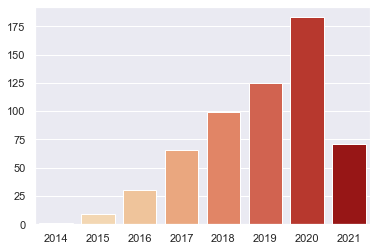

In [60]:
sns.barplot(x=year.index, y=year.values, palette="OrRd")

In [61]:
month = netflix.Month.value_counts()
month

10    77
4     63
11    57
5     53
9     53
12    51
3     48
2     39
1     37
8     37
6     35
7     34
Name: Month, dtype: int64

<AxesSubplot:>

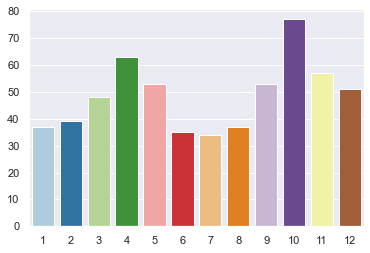

In [73]:
sns.barplot(x=month.index, y=month.values, palette="Paired")


#### We can see that usually in the October month lots of movies get released whereas least is aroudn July

In [79]:
day = netflix.Day.value_counts(sort=False)
day

0     17
1     29
2     82
3     59
4    383
5      5
6      9
Name: Day, dtype: int64

#### We can see that lots of movies are released on a Friday, which will imply that the audience will view it on Saturday/Sunday

<AxesSubplot:>

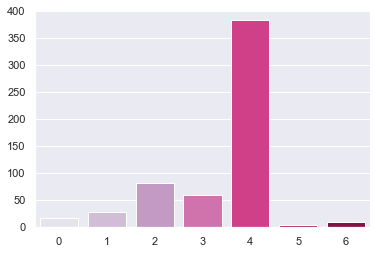

In [82]:
sns.barplot(x=day.index, y=day.values, palette="PuRd")


### 2. Language

In [15]:
netflix.Language.nunique()

38

#### We have 38 unique languages in this dataset

In [16]:
netflix.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
Turkish                         5
German                          5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
English/Mandarin                2
Filipino                        2
Thai                            2
English/Japanese                2
English/Swedish                 1
English/Korean                  1
Georgian                        1
English/Akan                    1
Tamil                           1
Thia/English                    1
English/Arabic                  1
Spanish/English                 1
English/Taiwanese/Mandarin      1
Norwegian     

#### Evidently, most movies on Netflix are in English

In [17]:
top_5_lang = netflix.Language.value_counts().nlargest(5)
top_5_lang

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: Language, dtype: int64

#### Out of all the languages, most movies uploaded by Netflix are in these 5 languages

<AxesSubplot:>

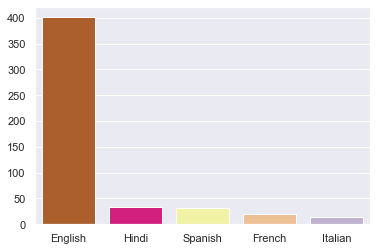

In [18]:
sns.barplot(x=top_5_lang.index, y=top_5_lang.values, palette="Accent_r")

#### Therefore, English is the most used, followed by Hindi and Spanish, but they are no where comparable to English

### 3. Genre

In [19]:
netflix.Genre.nunique()

115

#### We have 115 unique genres

In [20]:
netflix.Genre.value_counts()

Documentary                159
Drama                       77
Comedy                      49
Romantic comedy             39
Thriller                    33
                          ... 
Action thriller              1
Urban fantasy                1
Historical-epic              1
Musical/Western/Fantasy      1
Biographical/Comedy          1
Name: Genre, Length: 115, dtype: int64

#### Out of which Documnentary seems to be the most popular genre

In [21]:
top_5_genre = netflix.Genre.value_counts().nlargest(5)

In [22]:
top_5_genre

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: Genre, dtype: int64

#### Here are the top 5 common genres available on Netflix. Most common is documentary and with a significant difference of 82, drama stands as second most common

<AxesSubplot:>

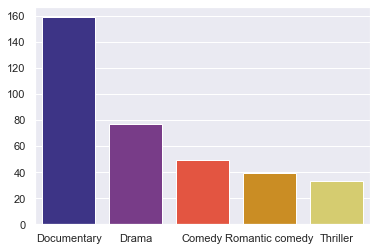

In [23]:
sns.barplot(x=top_5_genre.index, y=top_5_genre.values, palette="CMRmap")

### 4. Runtime

In [24]:
netflix.Runtime

0       58
1       81
2       79
3       94
4       90
      ... 
579    125
580     91
581    153
582     89
583     83
Name: Runtime, Length: 584, dtype: int64

In [25]:
print('Range of runtime in given data set is :', netflix.Runtime.max() - netflix.Runtime.min())

Range of runtime in given data set is : 205


In [26]:
netflix.Runtime.describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

In [27]:
netflix.Runtime.median()

97.0

#### Here the median is more than the mean 

<AxesSubplot:xlabel='Runtime', ylabel='Count'>

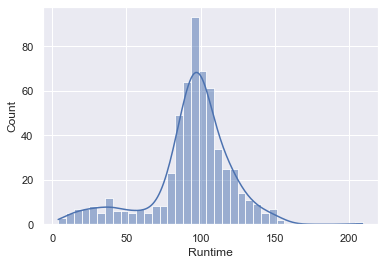

In [28]:
sns.histplot(data=netflix, x="Runtime", kde=True)

#### The graph is slightly left skewed and has a long tail towards the right with indicates that there are outliers

<AxesSubplot:xlabel='Runtime'>

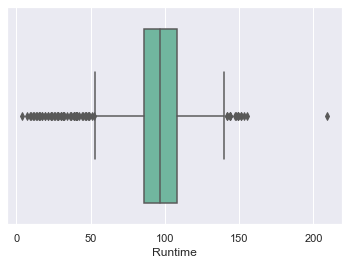

In [29]:
sns.boxplot(x=netflix["Runtime"], palette="BuGn")

In [30]:
# Calculating IQR 
Q1=netflix['Runtime'].quantile(0.25)
Q3=netflix['Runtime'].quantile(0.75)
IQR=Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q3 - 1.5*IQR
print('Upper bound is :',upper_bound)

Upper bound is : 141.0


In [31]:
# Number of movies with runtime graeter than 141

((netflix['Runtime'] > upper_bound)).sum()

15

#### Around 15 movies are longer than 141 minutes

In [32]:
netflix[netflix.Runtime  > upper_bound]["Title"]

5                                                  Drive
7                        The Last Days of American Crime
16                                         Ghost Stories
118                                          Ride or Die
194                                     Army of the Dead
247                                             Citation
284                                   The Forest of Love
328                                          Da 5 Bloods
365                                      Ajeeb Daastaans
389                                              22 July
509                                       Raat Akeli Hai
543                                                 Ludo
545    Rolling Thunder Revue: A bob Dylan Story by Ma...
561                                         The Irishman
581                              Springsteen on Broadway
Name: Title, dtype: object

#### These movies are longer than 141 minutes of runtime

In [42]:
netflix[netflix.Runtime == netflix.Runtime.max()][["Title", "Genre"]]

,Title,Genre
561,The Irishman,Crime drama


#### A crime drama film is the longest in given dataset

In [34]:
((netflix['Runtime'] <  lower_bound)).sum()

89

#### Around 90 movies are lesser than the lower bound run time, which clearly marks a left-skewed distribution

In [35]:
netflix[netflix.Runtime <  lower_bound]["Title"]

0                        Enter the Anime
8                                Paradox
10                  Searching for Sheela
15                        After the Raid
20     Hello Privilege. It's Me, Chelsea
                     ...                
541                    The White Helmets
552                                Anima
558                         Road to Roma
560       If Anything Happens I Love You
577               Dancing with the Birds
Name: Title, Length: 89, dtype: object

In [43]:
netflix[netflix.Runtime == netflix.Runtime.min()][["Title", "Genre"]]

,Title,Genre
40,Sol Levante,Anime / Short


#### An anime film is the shortest film

### 5. IMDB Score

In [37]:
netflix['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

#### Average IMDB score in this dataset is 6.2, with max rating as 9 and min rating at 2.5

<AxesSubplot:xlabel='IMDB Score', ylabel='Count'>

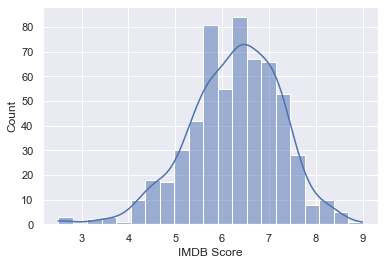

In [38]:
sns.histplot(data=netflix, x="IMDB Score", kde=True)

#### The distribution has a long tail on the left indicating outliers

In [45]:
netflix[netflix["IMDB Score"] == netflix["IMDB Score"].max()][["Title", "Genre"]]

,Title,Genre
583,David Attenborough: A Life on Our Planet,Documentary


In [46]:
netflix[netflix["IMDB Score"] == netflix["IMDB Score"].min()][["Title", "Genre"]]

,Title,Genre
0,Enter the Anime,Documentary


#### Both the min and maximum IMDB ratings are for documentaries

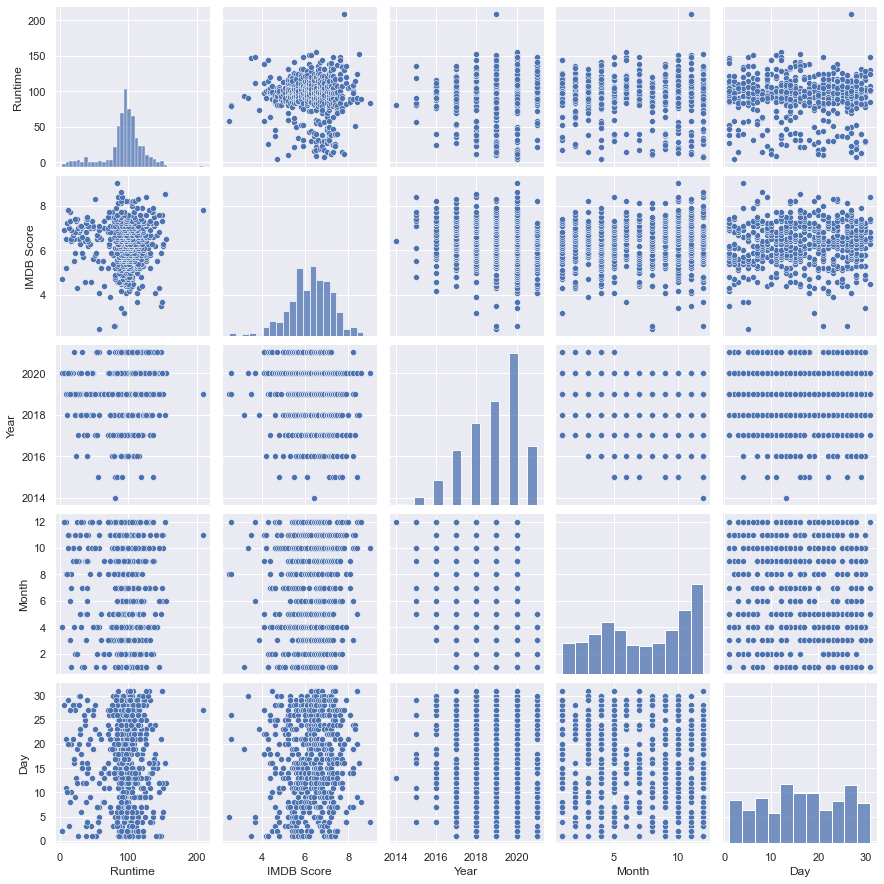

In [47]:
sns.pairplot(netflix)

#### From the pairplot we notice that none of the variables are positively or negatively correlated to one another

#### Top 20 movies with the best rating

In [92]:
top_20_movies = netflix[["IMDB Score", "Title", "Genre", "Year", "Language"]].sort_values(["IMDB Score"], ascending=False)[:20]
top_20_movies

,IMDB Score,Title,Genre,Year,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,2020,English
582,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,2020,Portuguese
581,8.5,Springsteen on Broadway,One-man show,2018,English
580,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015,English/Ukranian/Russian
579,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018,English
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,2020,English
577,8.3,Dancing with the Birds,Documentary,2019,English
576,8.3,Cuba and the Cameraman,Documentary,2017,English
573,8.2,Klaus,Animation/Christmas/Comedy/Adventure,2019,English
571,8.2,13th,Documentary,2016,English


<AxesSubplot:xlabel='IMDB Score', ylabel='Title'>

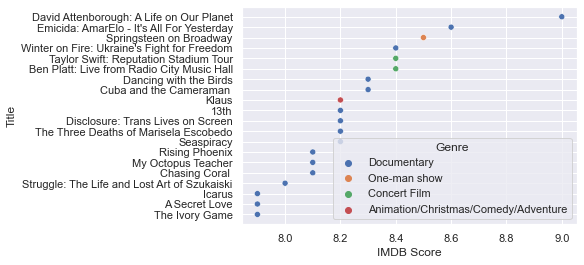

In [94]:
sns.scatterplot(data=top_20_movies, x="IMDB Score", y="Title", hue="Genre")

#### We can evidently see that most of the top 20 rated movies are documentaries

In [89]:
netflix.groupby("Genre")["IMDB Score"].mean().nlargest(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Name: IMDB Score, dtype: float64

#### But on an average, the top rated genre is Animation/Christmas/Comedy/Adventure

In [90]:
netflix.groupby("Genre")["IMDB Score"].mean().nsmallest(10)

Genre
Heist film/Thriller        3.700000
Musical/Western/Fantasy    3.900000
Horror anthology           4.300000
Political thriller         4.300000
Superhero-Comedy           4.400000
Science fiction/Drama      4.533333
Romance drama              4.600000
Mystery                    4.650000
Anime / Short              4.700000
Horror thriller            4.700000
Name: IMDB Score, dtype: float64

#### On an average, the least rated genre is Heist film/Thriller surprisingly